## Lead Scoring Case Study

### Goal:-
#### To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

### Step 1: Importing Important Libraries

In [353]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [354]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Step 2: Reading and Understanding the Data

In [355]:
# Importing all datasets
df_lead = pd.read_csv("Leads.csv")
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [356]:
df_lead.shape

(9240, 37)

In [357]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [358]:
#Checking Info of each column and get idea about categorical variables and numerical variable
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Step 3: EDA

## <li>Feature selection</li>

In [359]:
#Checking Duplicate for 'Prospect ID','Lead Number' 
sum(df_lead.duplicated(subset = ['Prospect ID','Lead Number'])) == 0

True

- <b>Above result show that no duplicate values is there we should drop both column becouse these are the ID provide by the system</b>

In [360]:
df_lead=df_lead.drop(['Prospect ID', 'Lead Number'], axis=1)

#### some of column have 'Select' value means no value selected from dropdown by custome so it can be replace by Nan

In [361]:
df_lead=df_lead.replace("Select", np.nan)

In [362]:
#FInd the Null value of each column
(df_lead.isnull().mean() * 100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

<b> Now you look on above result there lot of column contains null value so drop those column which contain null value more than 35%</b>

In [363]:
perc_null_value=df_lead.isnull().mean() * 100
drop_col=perc_null_value[perc_null_value>35].keys()
df_lead=df_lead.drop(drop_col,axis=1)
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [364]:
df_lead.shape

(9240, 25)

In [365]:
df_lead.columns.sort_values()

Index(['A free copy of Mastering The Interview', 'Converted', 'Country',
       'Digital Advertisement', 'Do Not Call', 'Do Not Email',
       'Get updates on DM Content', 'I agree to pay the amount through cheque',
       'Last Activity', 'Last Notable Activity', 'Lead Origin', 'Lead Source',
       'Magazine', 'Newspaper', 'Newspaper Article', 'Page Views Per Visit',
       'Receive More Updates About Our Courses', 'Search',
       'Through Recommendations', 'Total Time Spent on Website', 'TotalVisits',
       'Update me on Supply Chain Content', 'What is your current occupation',
       'What matters most to you in choosing a course', 'X Education Forums'],
      dtype='object')

In [366]:
df_lead.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

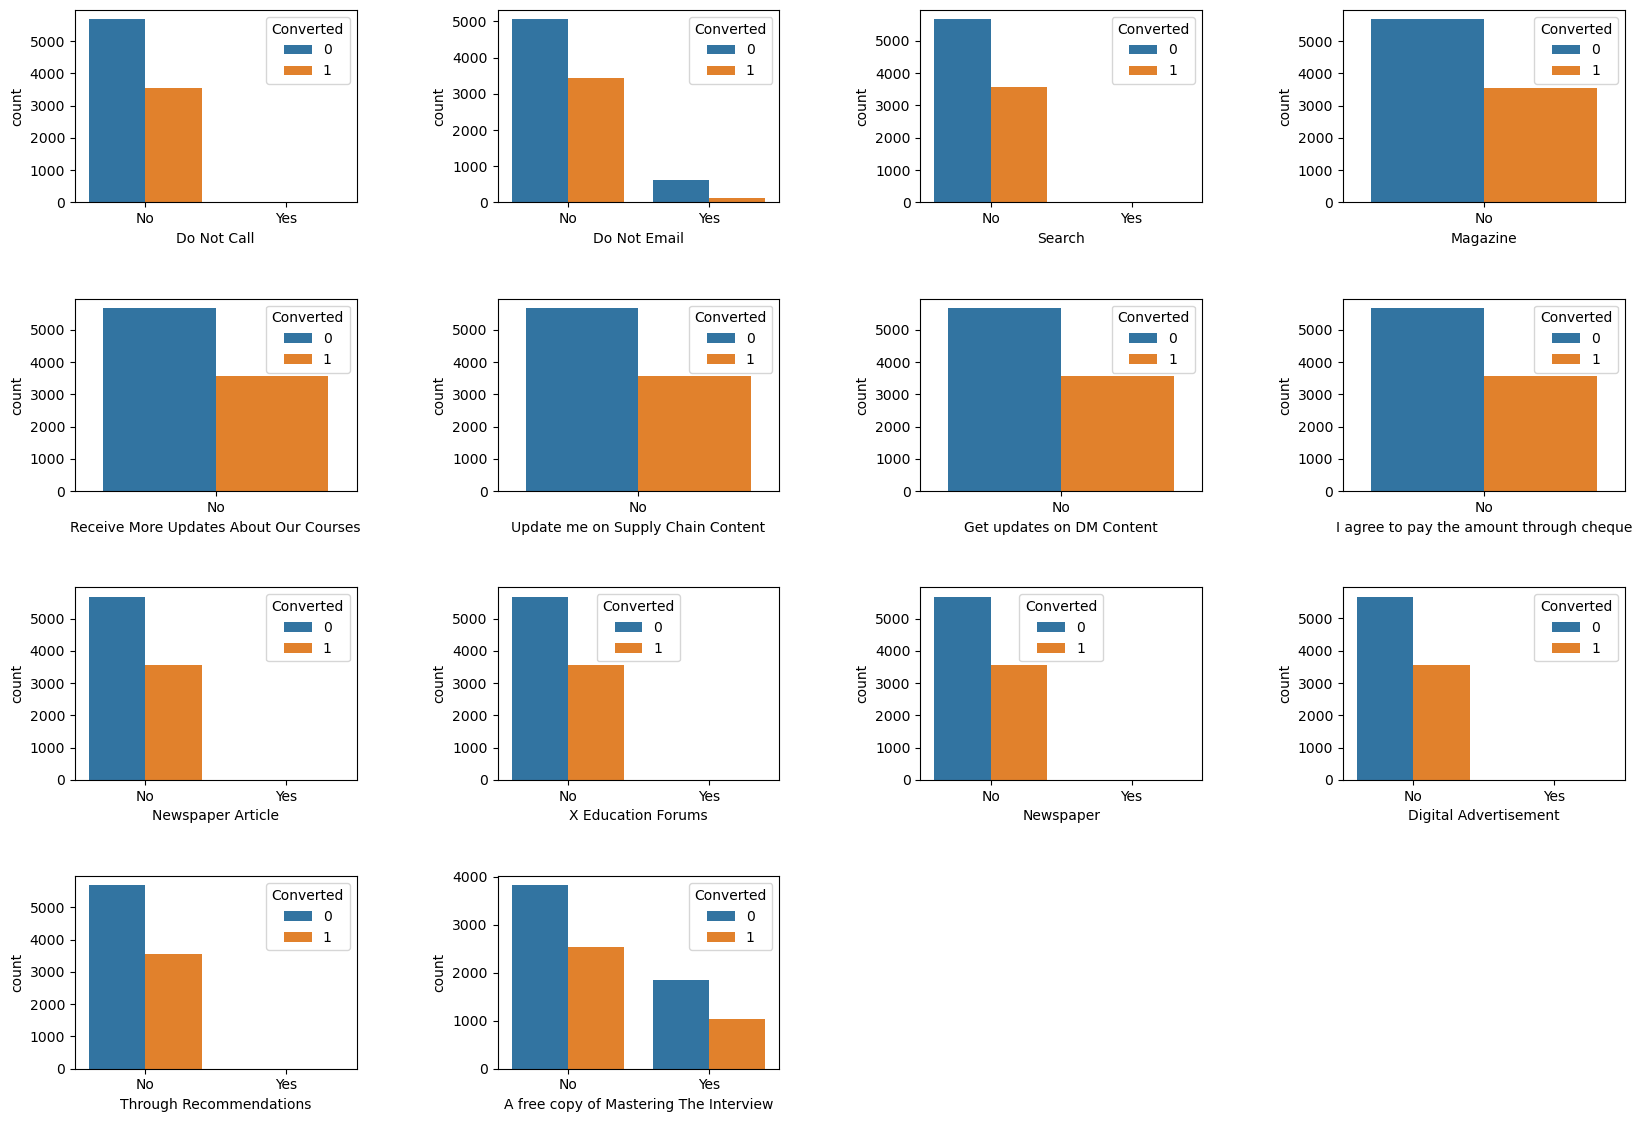

In [367]:
# now check the Imbalanced Variables with Target column 
cat_col = ['Do Not Call', 'Do Not Email','Search','Magazine',  'Receive More Updates About Our Courses' ,  'Update me on Supply Chain Content'  ,
                     'Get updates on DM Content' ,'I agree to pay the amount through cheque','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                     'Through Recommendations','A free copy of Mastering The Interview'] 


plt.figure(figsize=(20,25))

for i, col in enumerate(cat_col):
    plt.subplot(7,4,i+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    sns.countplot(data=df_lead,x=col,hue='Converted')

##### Inference

- For all these columns except 'Do Not Email' and 'A free copy of Mastering The Interview' data is highly imbalanced, thus we will drop them
- "A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.

In [368]:
# Prepare the list of column which have to drop
col_to_drop = ['Do Not Call','Search','Magazine',  'Receive More Updates About Our Courses' ,  'Update me on Supply Chain Content'  ,
                     'Get updates on DM Content' ,'I agree to pay the amount through cheque','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                     'Through Recommendations','A free copy of Mastering The Interview'] 

In [369]:
#now see some of other column

obj_cat_col=['Lead Source','Country','What is your current occupation','What matters most to you in choosing a course','Last Activity','Lead Origin'
            ,'Last Notable Activity']


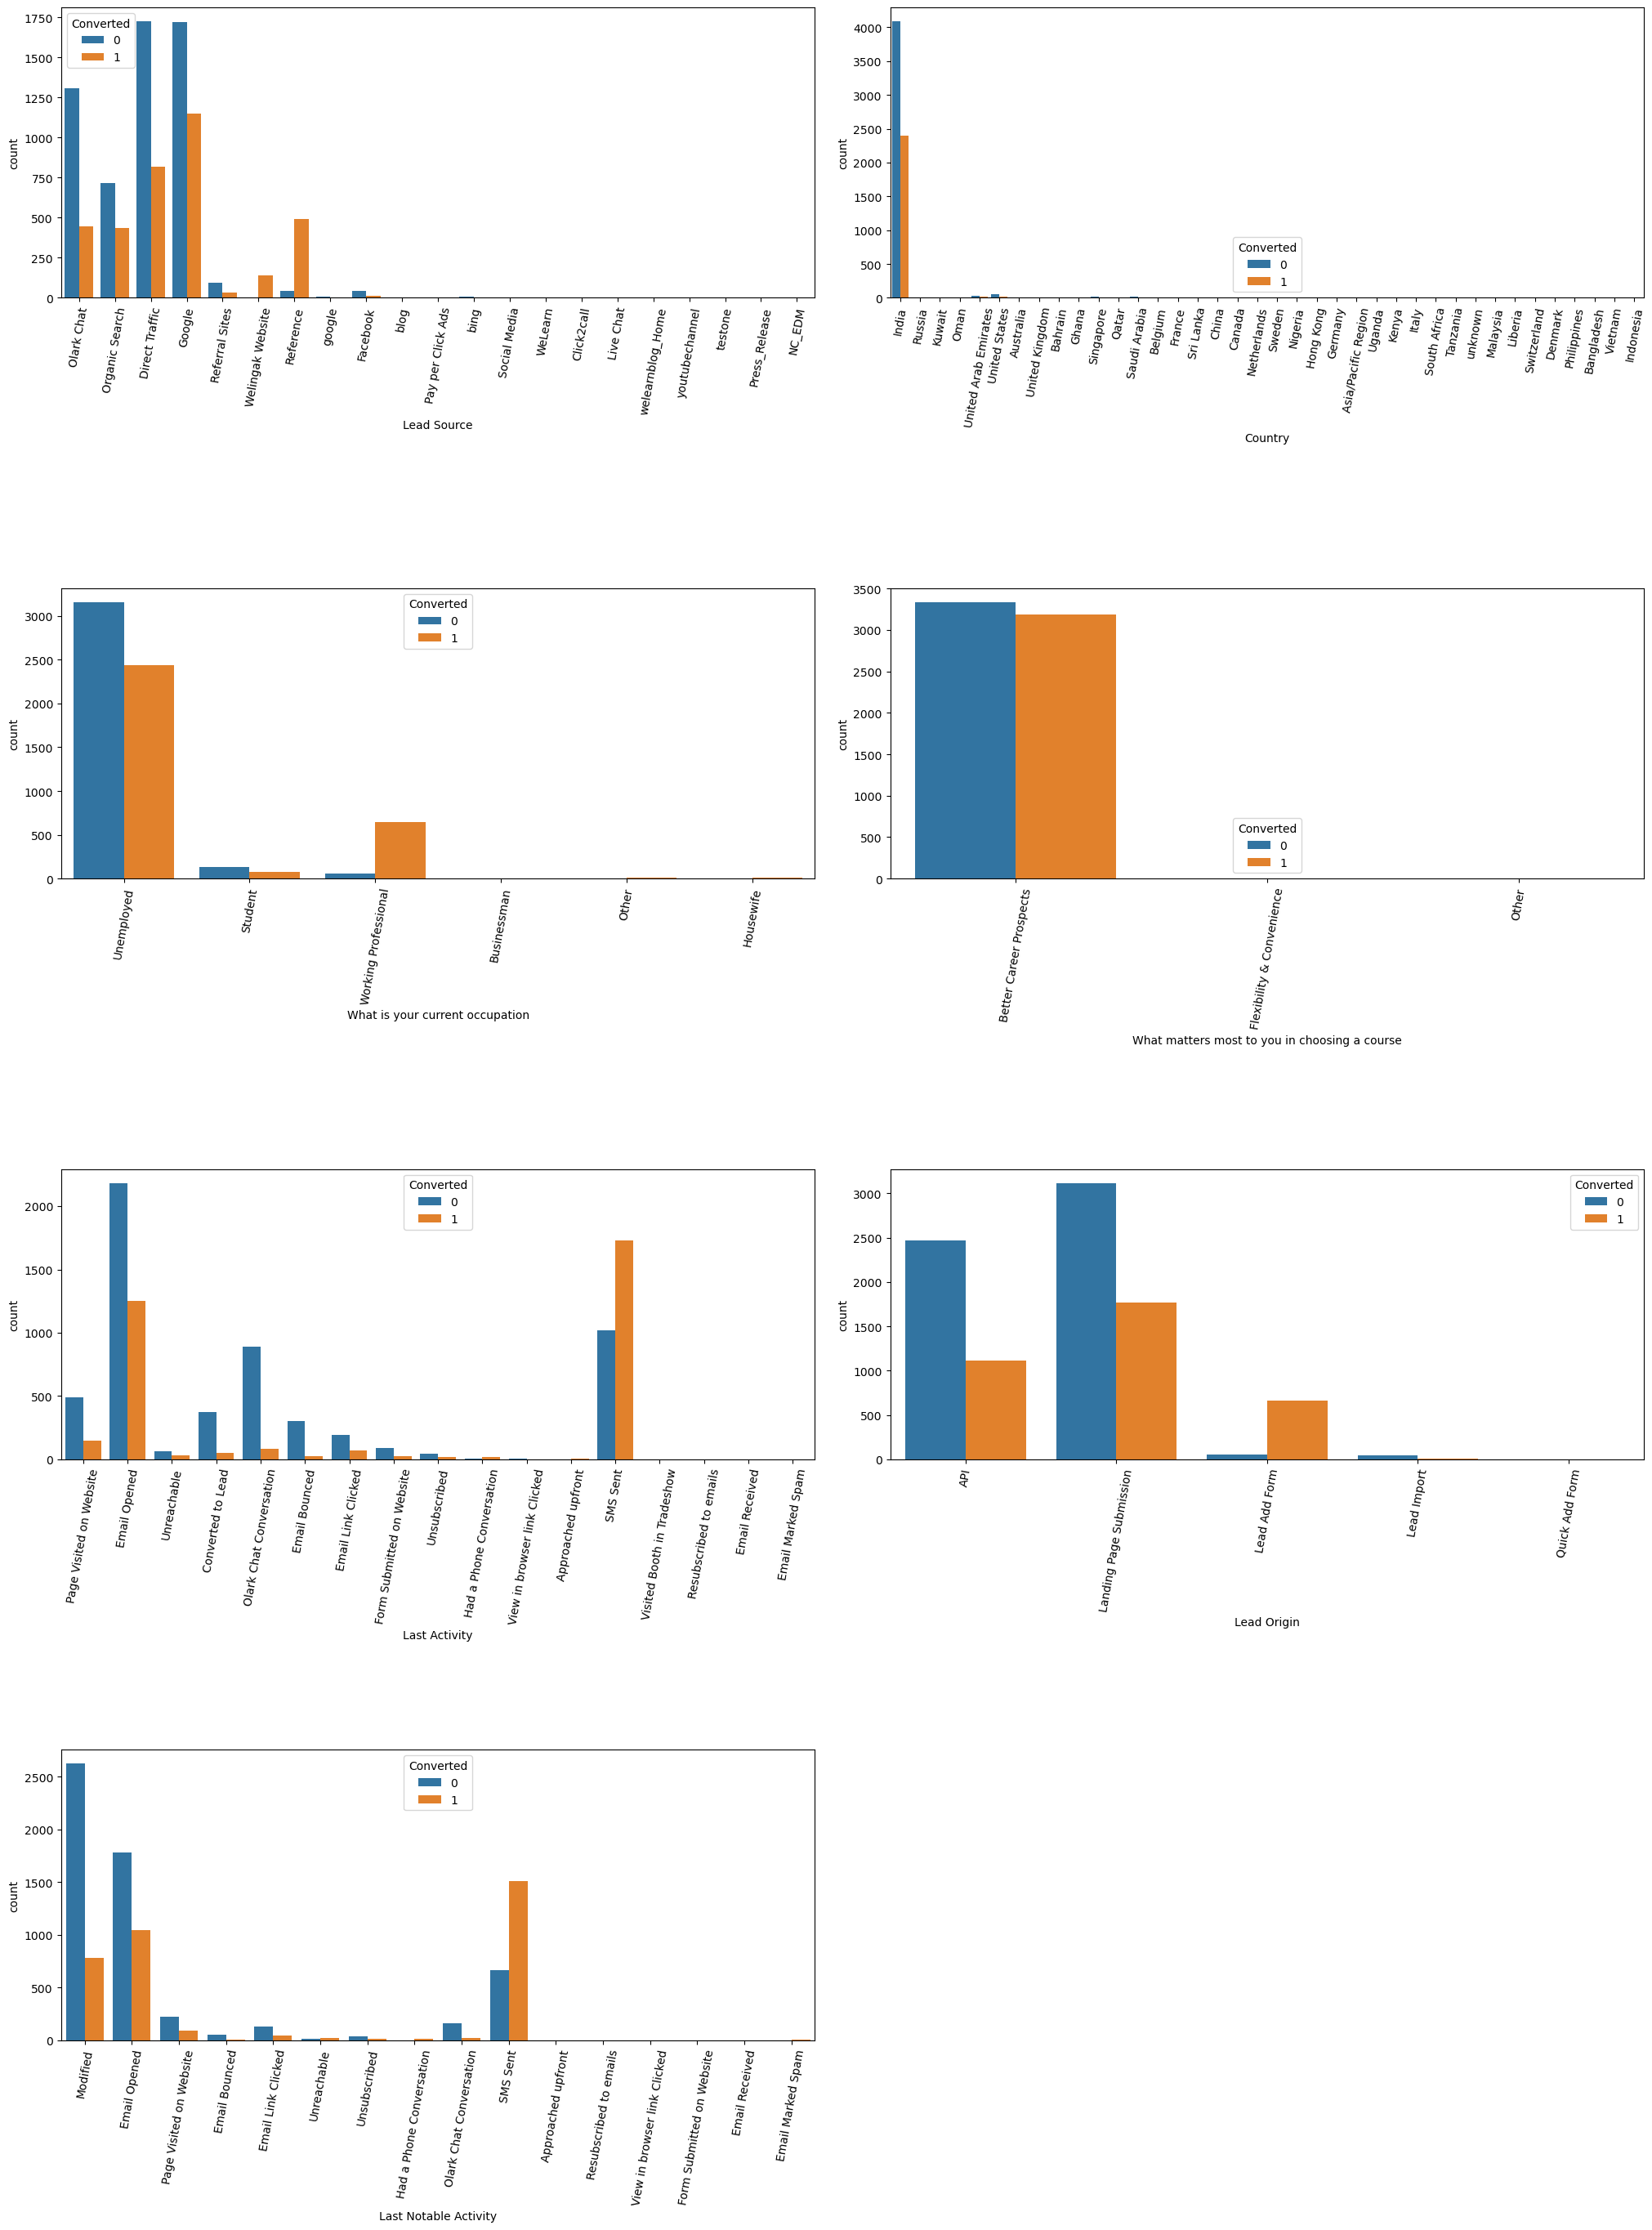

In [370]:
plt.figure(figsize=[25,60])
len1=len(obj_cat_col)
for i,col in enumerate(obj_cat_col):
    
    plt.subplot(len1,2,i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    plt.xticks(rotation=80)
    sns.countplot(data=df_lead,x=col,hue='Converted')

#### Inference
- `Lead Source`
    - Maximum Leads are generated by Google and Direct Traffic.
    - Conversion rate of Reference leads and Welinkgak Website leads is very high.
- `Country`
    - As we can see that most of the data consists of value 'India', no inference can be drawn from this parameter.Hence, we can drop this column
- `What is your current occupation`
    - Maximum leads generated are unemployed and their conversion rate is more than 50%.
    - Conversion rate of working professionals is very high.
- `What matters most to you in choosing a course`
    - This column spread of variance is very low , hence it can be dropped.
- `Last Activity & Last Notable Activity `
    - Maximum leads are generated having last activity as Email opened but conversion rate is not too good.
    - SMS sent as last acitivity has high conversion rate. so this column has been drop as it is a X-education's sales team generated data

In [371]:
# above colum which have been drop added in drop list column

col_to_drop.extend(['Country','What matters most to you in choosing a course','Last Activity','Last Notable Activity'])
col_to_drop

['Do Not Call',
 'Search',
 'Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity']

In [372]:
# drop above column list from df_lead data frame
df_lead = df_lead.drop(col_to_drop,1)

In [373]:
df_lead.shape

(9240, 8)

In [374]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9204 non-null   object 
 2   Do Not Email                     9240 non-null   object 
 3   Converted                        9240 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9240 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  6550 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 577.6+ KB


In [375]:
df_lead.dtypes

Lead Origin                         object
Lead Source                         object
Do Not Email                        object
Converted                            int64
TotalVisits                        float64
Total Time Spent on Website          int64
Page Views Per Visit               float64
What is your current occupation     object
dtype: object

## <li>Feature engineering</li>
- <b>In feature engineering we will do following technique </b>
   1. Missing Imputation
   2. Value Modification
   3. Outlier Detection & Treatment

In [376]:
df_lead.isnull().mean().sort_values(ascending = False).head(50)*100

What is your current occupation    29.112554
TotalVisits                         1.482684
Page Views Per Visit                1.482684
Lead Source                         0.389610
Lead Origin                         0.000000
Do Not Email                        0.000000
Converted                           0.000000
Total Time Spent on Website         0.000000
dtype: float64

## 1. Missing imputation
Few columns have around 13% or so null percentage. We will try to impute the important variables which will be helpful in taking insights.  There are few categorical variables and others are numerical variables. 

List of categorical variables are:
1. Lead Origin                  
2. Lead Source                   
3. Do Not Email                
4. What is your current occupation

List of numerical variables are:
1. TotalVisits                       
2. Total Time Spent on Website       
3. Page Views Per Visit           

### categorical variable: we will impute them 
   - with most repeated value. Mode will give us the most repeated value.
   
### numerical variable:  we will impute 
-  with Mean if the data is distributed normally.
-  with Median if there are outlier present.
-  with mode if replacing with most repeated value makes sense.

In [377]:
df_lead["Lead Origin"]=df_lead["Lead Origin"].fillna((df_lead['Lead Origin'].mode()[0]))
df_lead['Lead Source'] = df_lead['Lead Source'].fillna((df_lead['Lead Source'].mode()[0]))
df_lead['Do Not Email'] = df_lead['Do Not Email'].fillna((df_lead['Do Not Email'].mode()[0]))
df_lead['What is your current occupation'] = df_lead['What is your current occupation'].replace(np.nan, 'Not provided')
df_lead.isnull().mean().sort_values(ascending = False).head(50)*100

TotalVisits                        1.482684
Page Views Per Visit               1.482684
Lead Origin                        0.000000
Lead Source                        0.000000
Do Not Email                       0.000000
Converted                          0.000000
Total Time Spent on Website        0.000000
What is your current occupation    0.000000
dtype: float64

In [378]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
df_lead = df_lead.dropna()

In [379]:
df_lead.isnull().mean().sort_values(ascending = False).head(50)*100

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
What is your current occupation    0.0
dtype: float64

## 2. Value modifiction
- in this section we will change data type ,correct format of value etc.

In [380]:


df_lead.TotalVisits=df_lead.TotalVisits.astype('int64')    
df_lead['Page Views Per Visit']=df_lead['Page Views Per Visit'].astype('int64')


In [381]:
#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
df_lead['Lead Source'] = df_lead['Lead Source'].replace('google','Google')

In [382]:
df_lead.dtypes


Lead Origin                        object
Lead Source                        object
Do Not Email                       object
Converted                           int64
TotalVisits                         int64
Total Time Spent on Website         int64
Page Views Per Visit                int64
What is your current occupation    object
dtype: object

### 3. Outlier Detection & Treatment

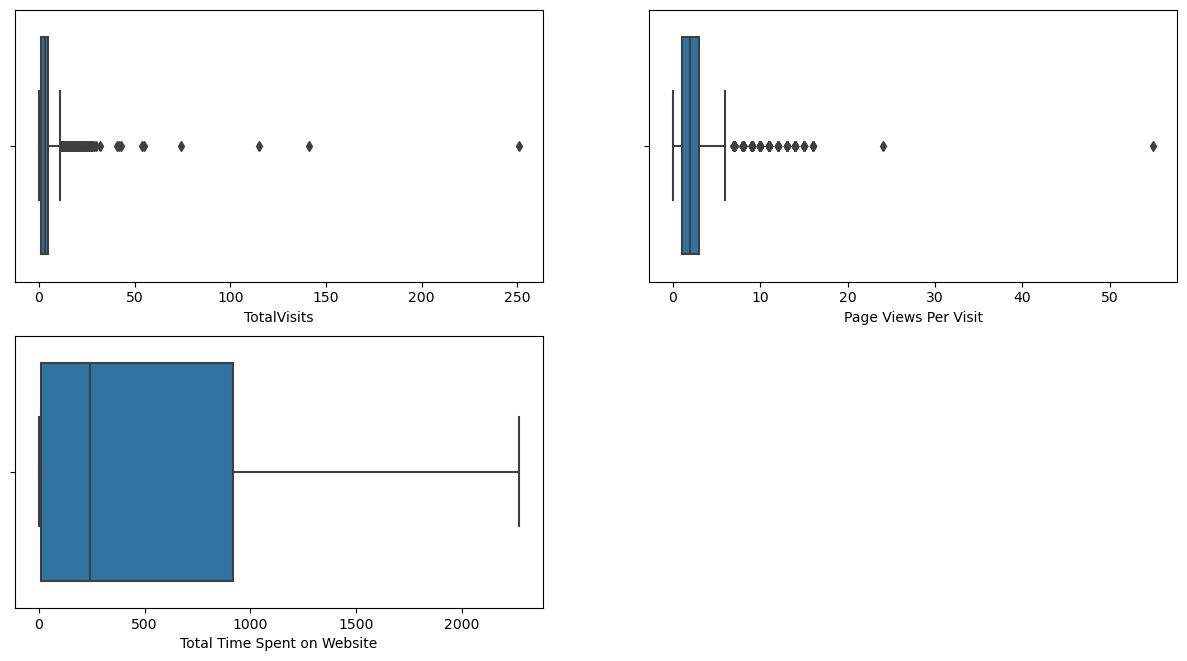

In [383]:
plt.figure(figsize=(15,12))

#figure 1
plt.subplot(3, 2, 1)
sns.boxplot(df_lead['TotalVisits'])

plt.subplot(3, 2, 2)
sns.boxplot(df_lead['Page Views Per Visit'])

plt.subplot(3, 2, 3)
sns.boxplot(df_lead['Total Time Spent on Website'])


plt.show()

- `TotalVisits & Page Views Per Visit `
    -  outliers for these column can be clearly seen in the above boxplot, thus outlier treatment is required
- `Total Time Spent on Website`
    - there are no major outliers for this column, outlier treatment is not required 


In [384]:
#Outlier Treatment: capping the outliers to 95% value for analysis
# -------------TotalVisits-----------
percentiles = df_lead['TotalVisits'].quantile([0.05,0.95]).values
df_lead['TotalVisits'][df_lead['TotalVisits'] <= percentiles[0]] = percentiles[0]
df_lead['TotalVisits'][df_lead['TotalVisits'] >= percentiles[1]] = percentiles[1]

#-----------Page Views Per Visit------------
percentiles = df_lead['Page Views Per Visit'].quantile([0.05,0.95]).values
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df_lead['Page Views Per Visit'][df_lead['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

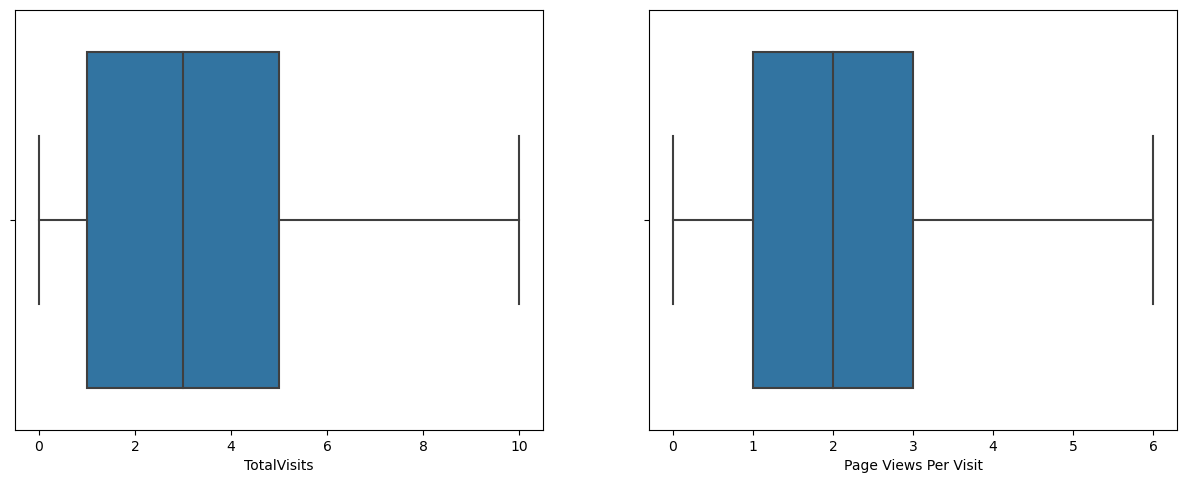

In [385]:
plt.figure(figsize=(15,12))

#figure 1
plt.subplot(2, 2, 1)
sns.boxplot(df_lead['TotalVisits'])

plt.subplot(2, 2, 2)
sns.boxplot(df_lead['Page Views Per Visit'])

plt.show()

### Univariate Analysis

In [386]:
# Finding out conversion rate
Converted = (sum(df_lead['Converted'])/len(df_lead['Converted'].index))*100
Converted

38.02043282434362

Currently, lead Conversion rate is 38% only

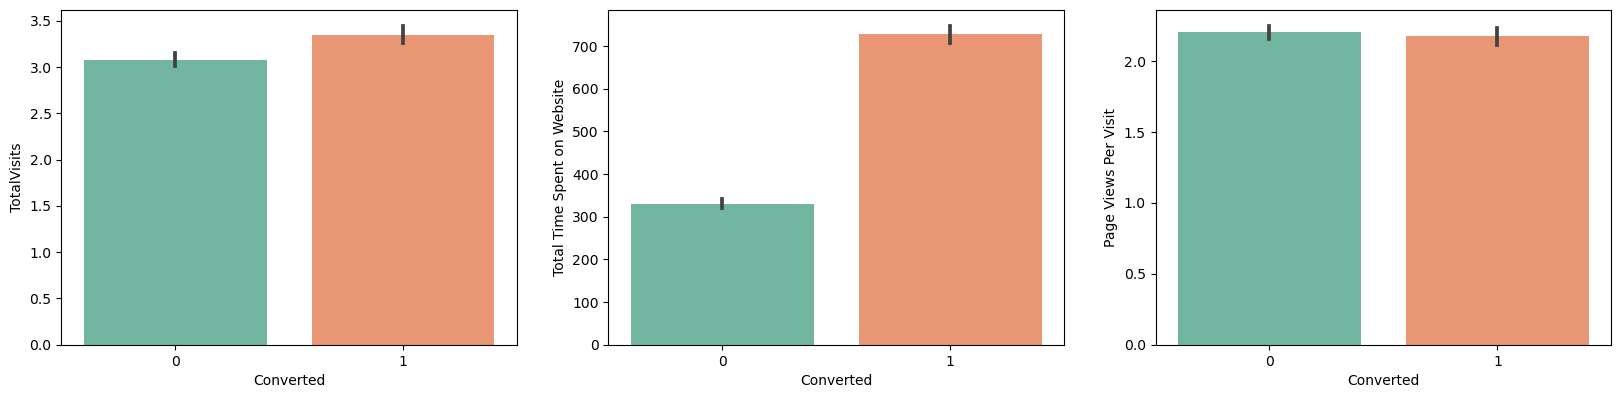

In [387]:
#  numerical variables

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = df_lead)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = df_lead)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = df_lead)
plt.show()

`Inference `
- The conversion rate is high for Total Visits, Total Time Spent on Website and Page Views Per Visit

### Step 4: Data Preparation for model
#### 4.1 Converting some binary variables (Yes/No) to 0/1

In [388]:

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the 'Do Not Email' 
df_lead[['Do Not Email']] = df_lead[['Do Not Email']].apply(binary_map)

In [389]:
df_lead['Do Not Email'].value_counts()

0    8379
1     724
Name: Do Not Email, dtype: int64

#### 4.2 combining low frequency values to Others

In [390]:
df_lead['Lead Source'].value_counts()

Google               2902
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [391]:

df_lead['Lead Source'] = df_lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Others')

#### 4.3 Dummy Variable Creation

In [392]:
#making the list of categorical variables
cat_cols_List= df_lead.select_dtypes(include=['object']).columns
cat_cols_List

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [393]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df_lead[['Lead Origin']], drop_first=True)
df_lead = pd.concat([df_lead,dummy],1)



dummy = pd.get_dummies(df_lead['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df_lead = pd.concat([df_lead, dummy], axis = 1)


dummy = pd.get_dummies(df_lead['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_Not provided'], 1)
df_lead = pd.concat([df_lead, dummy], axis = 1)

In [394]:
#dropping the original columns after dummy variable creation

df_lead.drop(cat_cols_List,1,inplace = True)

In [395]:
df_lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5,674,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,1,2,1532,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,305,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,2,1428,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [396]:
df_lead.shape

(9103, 23)

## 5: Model Building
### Step 5.1 : Splitting the Data into Training and Testing Sets

In [397]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [398]:
# Putting feature variable to X
X=df_lead.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,5,674,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,2,1532,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,305,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2,1428,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [399]:
X.shape

(9103, 22)

In [400]:
# Putting response variable to y
y = df_lead['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [401]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 5.2 Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for ` TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use StandardScaler scaling.

In [402]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler

In [403]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.662105,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.115337,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,-0.106617,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.448872,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.217594,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [404]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.02043282434362

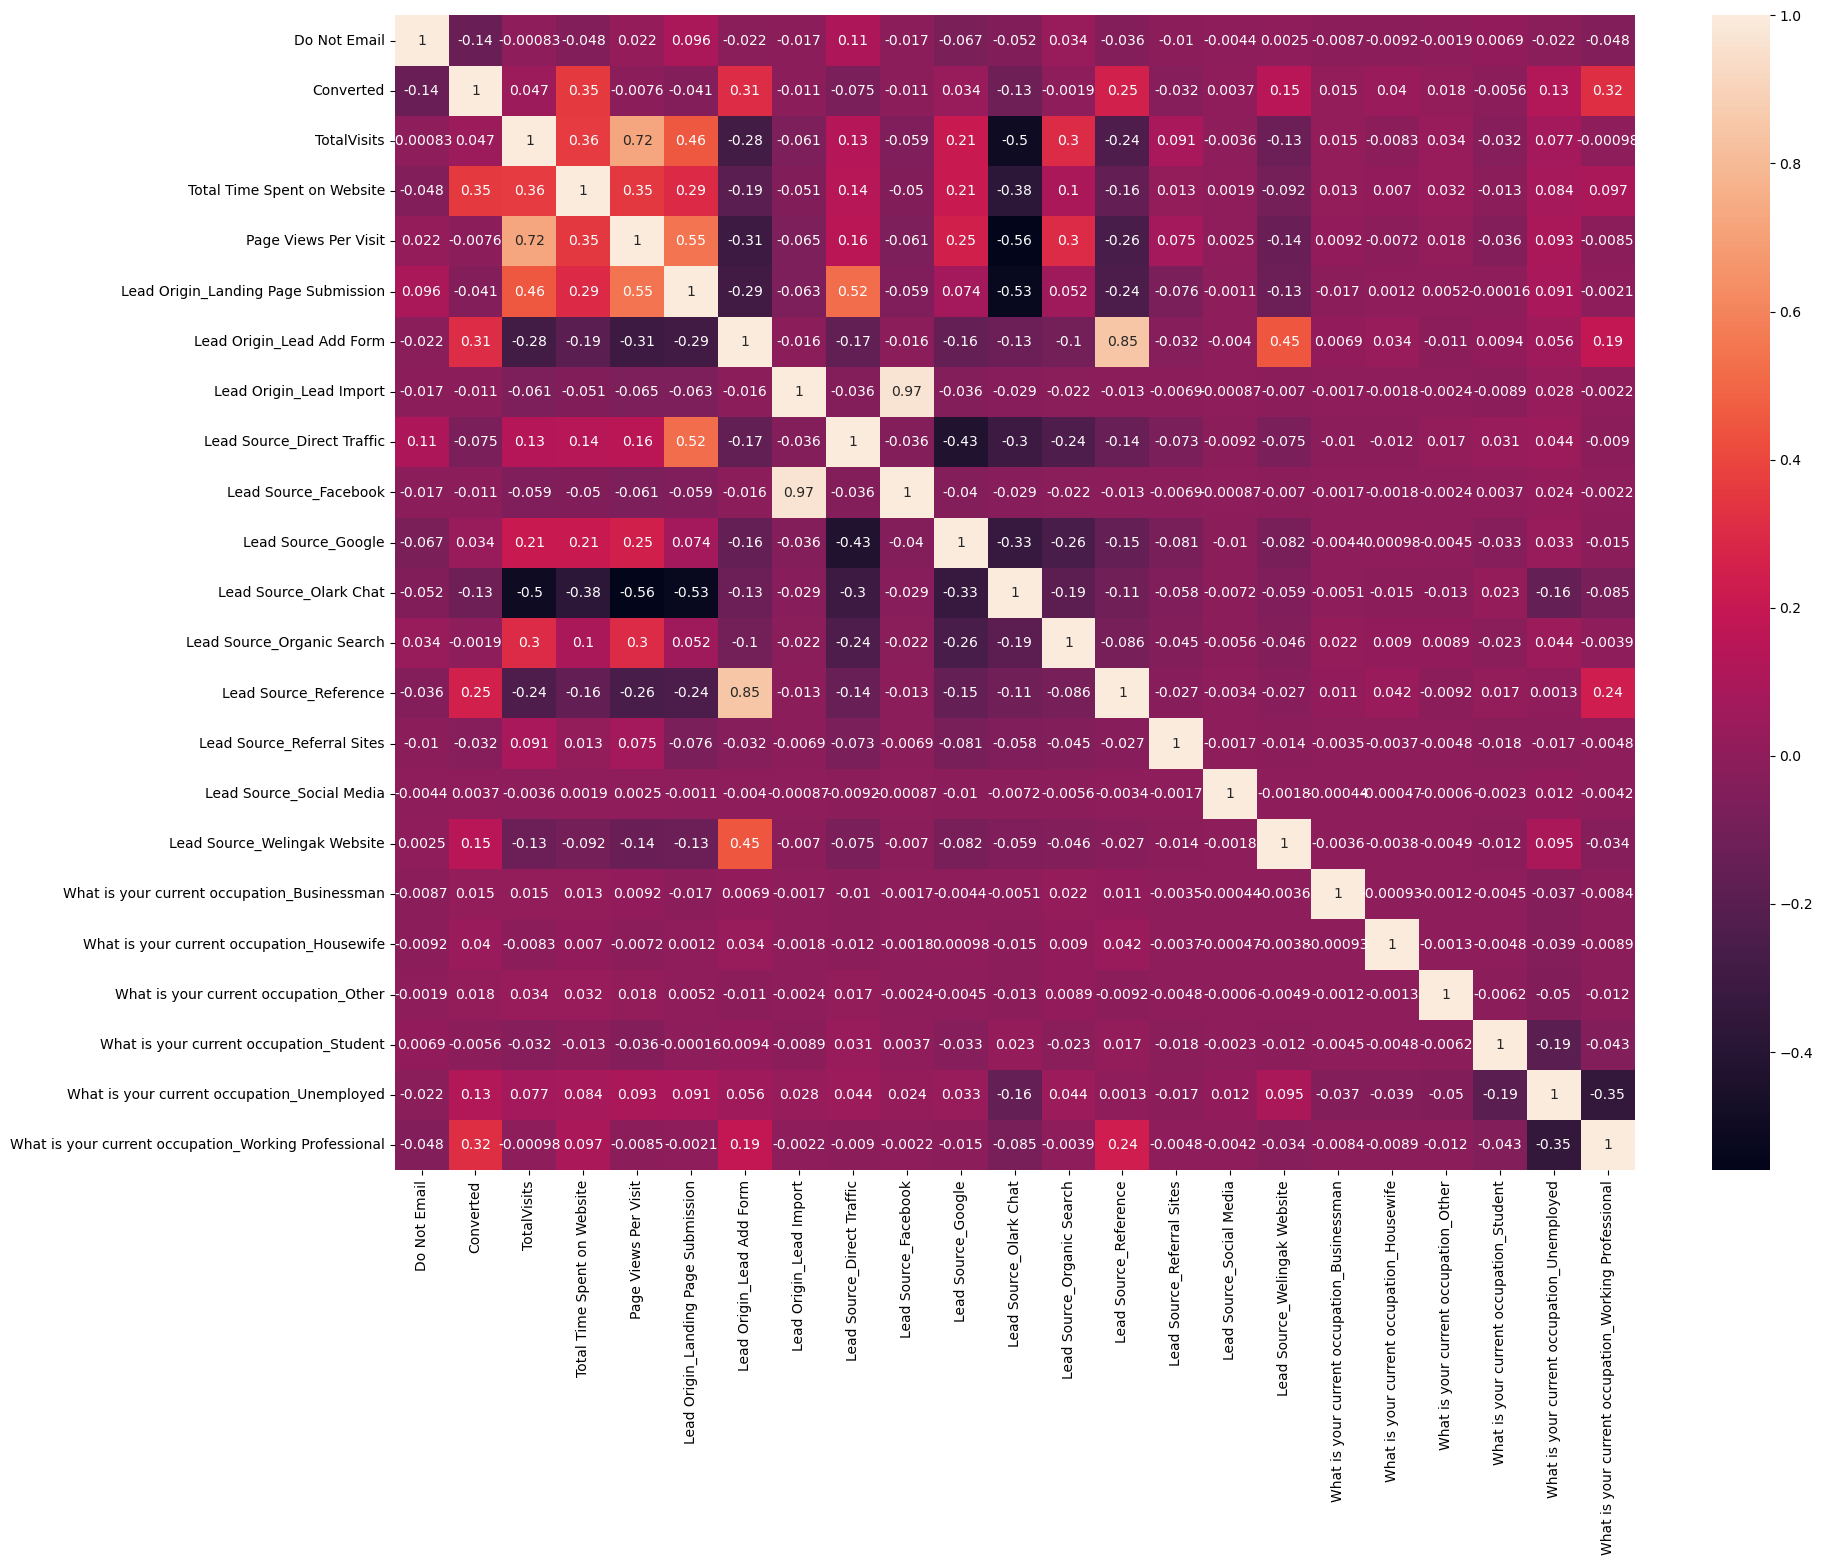

In [405]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(df_lead.corr(),annot = True)
plt.show()

#### Dropping highly correlated dummy variables

In [406]:
X_test = X_test.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)
X_train = X_train.drop(['Lead Source_Olark Chat','Lead Origin_Landing Page Submission'],1)

## 5.3 Build a Model using Stats Model & RFE

In [407]:
# importing necessary library
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [408]:
#initialize the LogisticRegression object
lr = LogisticRegression()



In [409]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [410]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 6),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

## 5.4 Manual elimination

##### Function to build a model using statsmodel api

In [411]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
    print(lm.summary())
    return lm

##### Function to calculate VIFs and print them

In [412]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [413]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [414]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Social Media'],
      dtype='object')

In [415]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional']]

In [416]:
X_train_rfe.shape

(6372, 15)

## Step 6: Building a Logistic model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

### 6.1 Model 1 - Start with all variables selected by RFE

In [417]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [418]:
#Selected columns for Model 1 - all columns selected by RFE


build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2862.8
Date:                Sat, 15 Jul 2023   Deviance:                       5725.6
Time:                        14:27:53   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3490
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,18.24
6,Lead Source_Reference,14.12
8,Lead Source_Welingak Website,5.12
13,What is your current occupation_Unemployed,2.61
4,Lead Source_Google,1.73
3,Lead Source_Direct Traffic,1.68
5,Lead Source_Organic Search,1.32
14,What is your current occupation_Working Profes...,1.30
1,Total Time Spent on Website,1.12
12,What is your current occupation_Student,1.05


- Dropping the variable `'What is your current occupation_Housewife'` as it has high coefficient 
        and is insignificant as it has high p-value

## 6.2 Model 2 after dropping 'What is your current occupation_Housewife'

In [419]:
cols = cols.drop('What is your current occupation_Housewife',1)

build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.3
Date:                Sat, 15 Jul 2023   Deviance:                       5744.6
Time:                        14:27:53   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,18.24
6,Lead Source_Reference,14.12
8,Lead Source_Welingak Website,5.12
12,What is your current occupation_Unemployed,2.60
4,Lead Source_Google,1.72
3,Lead Source_Direct Traffic,1.68
5,Lead Source_Organic Search,1.31
13,What is your current occupation_Working Profes...,1.30
1,Total Time Spent on Website,1.12
11,What is your current occupation_Student,1.05


- Dropping the variable `'Lead Source_Welingak Website'` as it has high coefficient 
        and is insignificant as it has high p-value

In [420]:
cols=cols.drop('Lead Source_Welingak Website',1)


## 6.3 Model 3 after dropping 'Lead Source_Welingak Website'

In [421]:
build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2872.5
Date:                Sat, 15 Jul 2023   Deviance:                       5745.1
Time:                        14:27:53   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3470
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,3.81
6,Lead Source_Reference,3.64
11,What is your current occupation_Unemployed,2.60
4,Lead Source_Google,1.71
3,Lead Source_Direct Traffic,1.68
5,Lead Source_Organic Search,1.31
12,What is your current occupation_Working Profes...,1.30
1,Total Time Spent on Website,1.12
10,What is your current occupation_Student,1.05
0,Do Not Email,1.03


- Dropping the variable `'What is your current occupation_Businessman'` as it has high coefficient 
        and is insignificant as it has high p-value

In [422]:
cols=cols.drop('What is your current occupation_Businessman',1)

## 6.4 Model 4 after dropping 'What is your current occupation_Businessman'

In [423]:
res=build_model(cols)
get_vif(cols)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.5
Date:                Sat, 15 Jul 2023   Deviance:                       5747.1
Time:                        14:27:53   Pearson chi2:                 6.42e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3468
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Lead Add Form,3.81
6,Lead Source_Reference,3.63
10,What is your current occupation_Unemployed,2.59
4,Lead Source_Google,1.71
3,Lead Source_Direct Traffic,1.68
5,Lead Source_Organic Search,1.31
11,What is your current occupation_Working Profes...,1.29
1,Total Time Spent on Website,1.12
9,What is your current occupation_Student,1.05
0,Do Not Email,1.03


#### Since the Model 4 seems to be stable with significant p-values and good value of VIF, So we need not drop any more variables and we can proceed with making predictions using this model only

## Step 7. Model Evaluation 

#### Predicting a Train model

In [424]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.733171
5520    0.149889
1962    0.224005
1566    0.968208
9170    0.309629
5097    0.111166
8954    0.254295
309     0.258676
5519    0.111166
1050    0.648711
dtype: float64

In [425]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.7331714 , 0.14988878, 0.22400453, 0.96820766, 0.30962916,
       0.11116625, 0.2542946 , 0.25867625, 0.11116625, 0.64871084])

In [426]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.733171,7962
1,0,0.149889,5520
2,0,0.224005,1962
3,1,0.968208,1566
4,0,0.309629,9170


In [427]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.733171,7962,1
1,0,0.149889,5520,0
2,0,0.224005,1962,0
3,1,0.968208,1566,1
4,0,0.309629,9170,0


#### Metrics -Accuracy, Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [428]:
from sklearn import metrics

In [429]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3547  406]
 [ 849 1570]]


In [430]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8030445699937225


In [431]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [432]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.649028524183547

In [433]:
# Let us calculate specificity
TN / float(TN+FP)

0.8972931950417404

In [434]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10270680495825955


In [435]:
# positive predictive value 
print (TP / float(TP+FP))

0.7945344129554656


In [436]:
# Negative predictive value
print (TN / float(TN+ FN))

0.806869881710646


#### PLOTTING ROC CURVE
- An ROC curve demonstrates several things:

    - It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
    - The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
    - The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [437]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [438]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

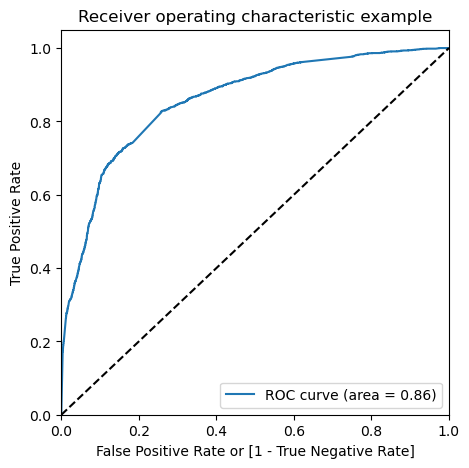

In [439]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### The ROC Curve should be a value close to 1. We are getting a good value of 0.86 indicating a good predictive model.

#### Finding Optimal Cutoff Point
##### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [440]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.733171,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.149889,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.224005,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.968208,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.309629,9170,0,1,1,1,1,0,0,0,0,0,0


In [441]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.516321  0.982224  0.231217
0.2   0.2  0.690207  0.906573  0.557804
0.3   0.3  0.771186  0.829682  0.735391
0.4   0.4  0.801318  0.699463  0.863648
0.5   0.5  0.803045  0.649029  0.897293
0.6   0.6  0.780917  0.561802  0.915001
0.7   0.7  0.759259  0.467135  0.938022
0.8   0.8  0.733522  0.352625  0.966608
0.9   0.9  0.690050  0.192228  0.994688


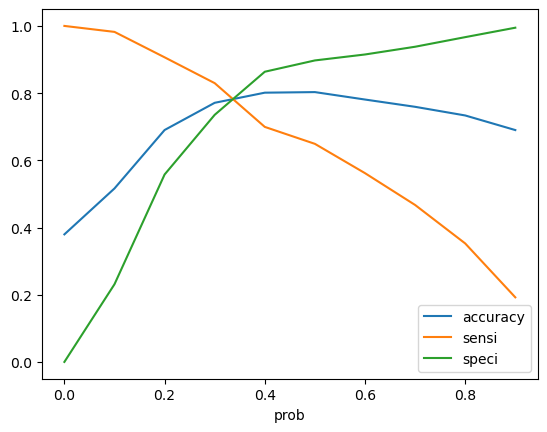

In [442]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [443]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.733171,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.149889,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.224005,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.968208,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.309629,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [444]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.733171,7962,1,73
1,0,0.149889,5520,0,15
2,0,0.224005,1962,0,22
3,1,0.968208,1566,1,97
4,0,0.309629,9170,1,31


In [445]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2007
0     412
Name: final_Predicted, dtype: int64

In [446]:
# check the precentage of final_predicted conversions

2005/float(2005+414)

0.8288548987184787

#### Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.
##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [447]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7711864406779662

In [448]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2907, 1046],
       [ 412, 2007]], dtype=int64)

In [449]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [450]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.829681686647375

In [451]:
# Let us calculate specificity
TN / float(TN+FP)

0.7353908423981786

##### Inference:
- So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

    - Accuracy : 77.05%
    - Sensitivity :82.89%
    - Specificity : 73.49%</br>
    
- Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [452]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2646091576018214


In [453]:
# Positive predictive value 
print (TP / float(TP+FP))

0.657386177530298


In [454]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8758662247664959


#### Precision and Recall

In [455]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2907, 1046],
       [ 412, 2007]], dtype=int64)

In [456]:
## Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.657386177530298

In [457]:
## Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.829681686647375

In [458]:
from sklearn.metrics import precision_score, recall_score

In [459]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.657386177530298

In [460]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.829681686647375

#### Precision and Recall Trade-off

In [461]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [462]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

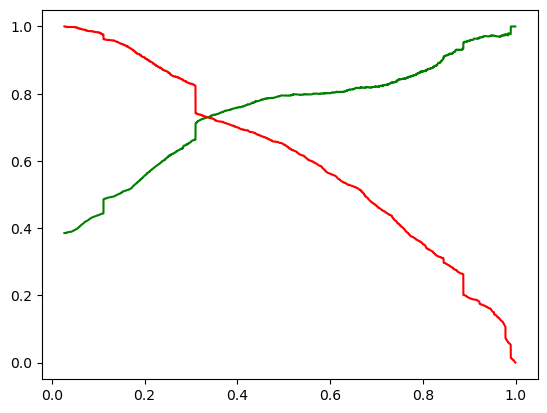

In [463]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Predictions on the test set

In [464]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.452947,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.222446,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.105517,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,1.011411,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.663982,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [465]:
X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.108519,0,0,0,1,0,0,0,0,1,0
4050,-0.293797,-0.888077,1,0,0,0,1,0,0,0,1,0
7201,3.403712,0.420993,0,1,0,0,0,0,0,0,1,0
1196,-0.293797,-0.110357,0,0,0,1,0,0,0,0,1,0
8219,-0.293797,-0.433947,0,1,0,0,0,0,0,0,1,0


In [466]:
X_test_sm = sm.add_constant(X_test)

In [467]:
X_test_sm.shape

(2731, 13)

In [468]:

    
y_test_pred = res.predict(X_test_sm)    

In [469]:
y_test_pred[:10]

3504    0.306327
4050    0.886565
7201    0.146954
1196    0.305897
8219    0.203498
8747    0.110397
9048    0.314569
6524    0.223879
7693    0.052063
8187    0.886565
dtype: float64

In [470]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [471]:
# Let's see the head
y_pred_1.head()

,0
3504,0.306327
4050,0.886565
7201,0.146954
1196,0.305897
8219,0.203498


In [472]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [473]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [474]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [475]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [476]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.306327
1,1,4050,0.886565
2,0,7201,0.146954
3,0,1196,0.305897
4,1,8219,0.203498


In [477]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [478]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.306327
1,1,4050,0.886565
2,0,7201,0.146954
3,0,1196,0.305897
4,1,8219,0.203498


#### Assigning Lead Score

In [479]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [480]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.306327,31
1,4050,1,0.886565,89
2,7201,0,0.146954,15
3,1196,0,0.305897,31
4,8219,1,0.203498,20


In [481]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [482]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.306327,31,1
1,4050,1,0.886565,89,1
2,7201,0,0.146954,15,0
3,1196,0,0.305897,31,1
4,8219,1,0.203498,20,0


In [483]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    866
0    176
Name: final_Predicted, dtype: int64

In [484]:
# check the precentage of final_predicted conversions on test data

865/float(865+177)

0.8301343570057581

#### Hence we can see that the final prediction of conversions have a target rate of 83% (same as predictions made on training data set)
#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [485]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7751739289637496

In [486]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1251,  438],
       [ 176,  866]], dtype=int64)

In [487]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [488]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8310940499040307

In [489]:
# Let us calculate specificity
TN / float(TN+FP)

0.7406749555950266

#### Precision and Recall metrics for the test set

In [490]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6641104294478528

In [491]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8310940499040307

In [492]:
print(res.params)

const                                                  -1.215483
Do Not Email                                           -0.361036
Total Time Spent on Website                             1.100447
Lead Origin_Lead Add Form                               4.609428
Lead Source_Direct Traffic                             -1.054654
Lead Source_Google                                     -0.781540
Lead Source_Organic Search                             -0.865549
Lead Source_Reference                                  -1.743645
Lead Source_Referral Sites                             -1.372928
What is your current occupation_Other                   1.325374
What is your current occupation_Student                 1.149720
What is your current occupation_Unemployed              1.277030
What is your current occupation_Working Professional    3.773254
dtype: float64


#### Inference:
- After running the model on the Test Data these are the figures we obtain:

    - Accuracy : 77.52%
    - Sensitivity :83.01%
    - Specificity : 74.13%

##### Conclusion:

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 77%, 83% and 74% which are approximately closer to the respective values calculated using trained set.
Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
- Hence overall this model seems to be good.

#### Important features responsible for good conversion rate or the ones' which contributes more towards the probability of<br/> a lead getting converted are :
- We can see that only 2 features from original dataset are important in evaluating the lead conversion. Following are two features.
    - Do Not Email
    - Total Time Spent on Website

- The features having higher coefficient values are more important in predicting the lead conversion. Following are the three dummy variables which help in lead conversion
    - Lead Origin_Lead Add Form
    - What is your current occupation_Working Professional
    - What is your current occupation_Other